# Insper - Instituto de Ensino e Pesquisa

___

# Projeto Kannada MNIST

### Equipe 1 - Talus

- Jamesson Leandro Paiva Santos
- Paulo Kim
- Pietro Zanaga Neto

### Diretor de Projeto

- Caio Emmanuel

___

## Sumário



___

<div class="contextualizacao"></div>

## Contextualização

O desenvolvimento de algoritmos de *machine learning* e inteligência artificial tem ganhado cada vez mais popularidade quando se trata de ferramentas que permitam construir bons modelos preditivos para identificação e classificação imagens. Um exemplo de aplicação cada vez mais comum é na **visão computacional**, a qual se vale de tais modelos para implementar sistemas que sejam capazes de identificar objetos com alta precisão (com utilidades na análise de imagens diagnósticos no campo da medicina, em sistemas industriais que precisam identificar objetos e suas posições para guiar braços robóticos etc.)

Uma possível aplicação de algoritmos voltados à classificação de imagens é a identificação de caracteres escritos à mão. E é com essa abordagem que este projeto foi desenvolvido, utilizando um banco de dados disponível na plataforma *[Kaggle](https://www.kaggle.com/)*, a qual disponibiliza inúmeros *datasets* que são utilizados por uma grande comunidade de programadores e cientistas de dados. 

O *dataset* escolhido para o trabalho foi o [Kannada MNIST](https://www.kaggle.com/c/Kannada-MNIST/overview), que consiste em uma série de imagens de dígitos Kannada, uma das principais línguas faladas na região sudoeste da Índia, contando com mais de 45 milhões de falantes nativos. O objetivo em cima dessa base de dados é *desenvolver um modelo que seja capaz de classificar corretamente um determinado dígito a partir de uma imagem caligrafada por alguém.* E para construir esse modelo, será construída uma **Rede Neural Convolucional (CNN)** que interprete a escrita kannadense a partir dos dados.

Antes de iniciar qualquer análise, é necessário importar todas as bibliotecas e módulos *python* necessários.

In [19]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
%matplotlib inline

# Ferramentas para construção do modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPool2D, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

___

<div class="base-dados"></div>

## Analisando a base de dados

A base de dados é composta de três arquivos:

- `train.csv`: corresponde aos dados para treinar o modelo
- `test.csv`: corresponde aos dados para testar o modelo (convém ressaltar que, por se tratar de um *dataset* oriundo de uma competição *Kaggle*, os dados não são rotulados, isto é, é necessário executar o modelo dentro da própria plataforma para avaliar a *performance* do modelo sobre estes dados.
- `Dig-MNIST.csv`: corresponde a dados extras para testar o modelo. Este é o que será usado como teste ao longo do desenvolvimento deste notebook.

Carregando a base de dados:

In [3]:
# Transformando arquivos csv em dataframes
train = pd.read_csv('Kannada-MNIST/train.csv')
test = pd.read_csv('Kannada-MNIST/test.csv')
extra = pd.read_csv('Kannada-MNIST/Dig-MNIST.csv')

In [4]:
# Visualizando a formatação dos dados
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

Cada imagem possui 28 pixels em altura e 28 em comprimento, o que totaliza 784 pixels por imagem (28x28). Cada pixel tem o seu próprio valor associado, o que indica o tom claro e escuro do respectivo pixel.

In [5]:
# Checando o tamanho do nosso dataframe
print(f'O dataframe de TREINO possui {train.shape[0]} LINHAS e {train.shape[1]} COLUNAS')
print(f'O dataframe de TESTE possui {extra.shape[0]} LINHAS e {extra.shape[1]} COLUNAS')

O dataframe de TREINO possui 60000 LINHAS e 785 COLUNAS
O dataframe de TESTE possui 10240 LINHAS e 785 COLUNAS


**Distribuição referente a cada dígito**

É importante verificar a quantidade de dados referente a cada um dos dígitos, pois uma maior quantidade de um determinado dígito em relação ao outro pode afetar o treinamento do algoritmo, podendo torná-lo tendencioso em classificar esse dígito mais comum, por exemplo.

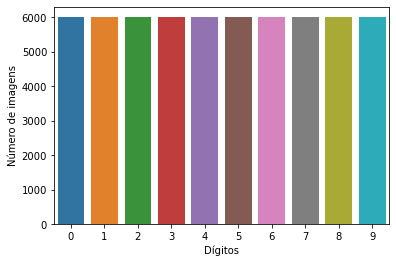

In [6]:
# Faz contagem de cada dígito
cont_train = train['label'].value_counts()

# Plota gráfico de barras
sns.barplot(cont_train.index, cont_train)
plt.xlabel('Dígitos')
plt.ylabel('Número de imagens')
plt.title('Dados de treinamento')

plt.show()

Aqui foi plotado um gráfico de barra para se compreender como está a distribuição das imagens. No  dataset, pode-se observar que o número de imagens está uniformemente distribuido, o que implica na não necessidade realizar algum tratamento ou manipulação em relação à quantidade para cada *label*.

Para cada *label*, tem-se 6.000 imagens, o que é um bom número para se trabalhar. Em seguida, serão plotadas algumas imagens. Como os pixels estão distribuídos em 784 colunas, é necessário reagrupá-las de forma que estajam no formato 28x28. Para isso, basta utlizar o *reshape*.

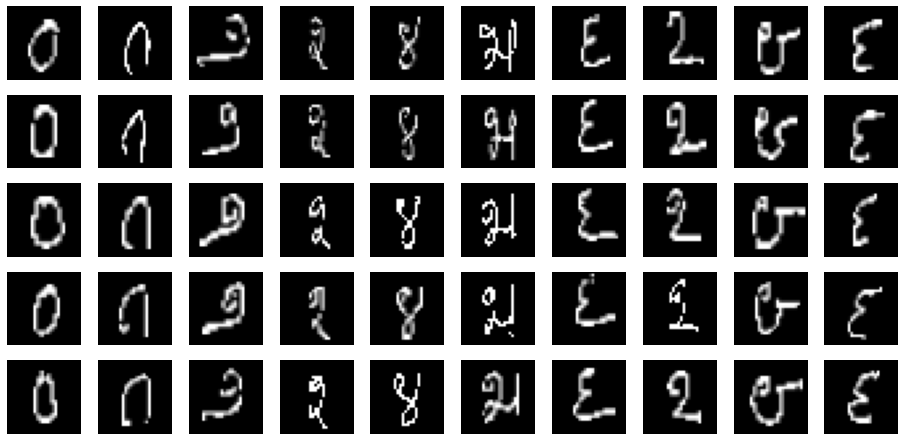

In [7]:
# Plota quadro com as primeiras 50 imagens
plt.figure(figsize=(16, 16))

for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

Com isso, é possível ter uma boa noção sobre com o que o trabalho está sendo feito! Agora, será iniciado o processo de montagem da CNN.

___

## Pré-processamento dos dados

Para que seja possível utilizar uma imagem como *input* em uma rede neural, é necessário realizar antes alguns processamentos que tornem o processo de treinamento mais fluido.

In [8]:
# Separando feature e targets 
Y_train=train['label']
X_train=train.drop('label',axis=1)

Para que se possa acelerar o processo de treinamento do modelo, será feita uma normalização. Em outras palavras, já que os valores do pixel variam entre 0 e 255, todos os valores serão divididos por 255 e, desse modo, os inputs terão valores "leves" para serem trabalhadas na rede neural. No final, os valores do pixels vão variar entre 0 e 1.

In [9]:
# Normalização
X_train = X_train/255
test = test/255

Também, as variáveis dos labels de numéricas serão convertidas para categóricas: 

In [10]:
# Converte para categórica
Y_train = to_categorical(Y_train)

É necessário, ainda, dividir os dados de treinamento em dois grupos:
- **Dados de treino**: são aqueles que de fato vão "ensinar" a rede neural como a variável *target* deve ser classificada em relação
- **Dados de validação**: são aqueles que avaliam como o modelo está performando ao longo do treinamento.

A divisão desses dados pode ser feita de maneira relativamente simples com a função *train_test_split()*, disponibilizada pela bilbioteca do *sckit-learn*. A proporção dessa quebra será de 30% para dados de validação e 70% para os de treinamento. Ainda, é comum adotar um *random_state* fixo para que, a cada execução do arquivo, essa divisão seja a mesma para evitar grandes variações a cada execução. Costuma-se usar $42$ para esse parâmetro.

In [11]:
x_train, x_val, y_train, y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 42) 

Como dito antes, os pixels estão distribuídas de forma linear em 784 colunas, então é necessário agrupá-los no formato 28x28x1 (altura, comprimento e color channel). O *color channel* são os canais de cores, onde o RGB (*Red, Green, Blue*) é o mais comumente utilizada. Neste caso, as imagens estão em preto e branco, ou seja, 1 *color channel*. 

In [12]:
# Redimensionando dados
x_train = x_train.values.reshape(-1, 28, 28, 1) 
x_val = x_val.values.reshape(-1, 28, 28, 1)
test = test.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

In [22]:
# Preparação dos dados extras

# feature e target
y_extra = extra['label']
x_extra = extra.drop('label',axis=1)

# normalização
x_extra = x_extra/255

# Redimensionamento
x_extra = x_extra.values.reshape(-1, 28, 28, 1) 
y_extra = to_categorical(y_extra)

____

<div class="cnn"></div>

## Uma breve introdução às Redes Neurais Convolucionais

A convolução é uma operação linear que relacionas duas matrizes, resultando em uma terceira, normalmente chamada de feature map. No contexto de imagens, podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada.

Um kernel é uma matriz utilizada para uma operação de multiplicação de matrizes. Esta operação é aplicada diversas vezes em diferentes regiões da imagem. A cada aplicação, a região é alterada por um parâmetro conhecido como stride. Normalmente o stride possui o valor 1, o que significa que a transformação será aplicada em todos os pixels da imagem. Cada kernel possui uma função importante, como detecção de linhas horizontais e verticais. A cada vez que se aprofunda nas camadas da rede neural, a complexidade da sua função aumenta, podendo assim identificar objetos e regiões mais específicas. Um exemplo dessa transformação é ilustrado abaixo.

<img src="../Projeto 1/img/conv.png"> 

Cada elemento da matriz principal é multiplicado ao respectivo elemento do kernel. O elemento da feature map é a somatória desses produtos. Abaixo segue um gif que representa esse processo:

<img src="../Projeto 1/img/conv_gif.gif"> 

É possível observar que a matriz resultante desse exemplo possui uma dimensionalidade menor que a imagem de origem. Muitas convoluções podem impactar na assertividade da CNN se o tamanho da imagem for muito reduzido. Para contornar esse cenário, normalmente é utilizado o conceito de Padding.

<div class="padding"></div>

#### *Padding* 

Padding é um processo em que alguns pixels são adicionados ao redor da imagem antes da operação de convolução, de forma a manter a dimensionalidade na imagem resultante durante a operação. No caso abaixo, foram adicionados pixels com valores 0.

Graças ao padding, a imagem pode ser convolucionada sem perder qualidade e informação

<img src="../Projeto 1/img/padding.png"> 

<div class="relu"></div>

#### *ReLu*

Uma rede neural sem função de ativação torna-se um modelo linear. Se o problema é linear, existem outros modelos mais simples que podem atender tão bem quanto uma rede neural. Infelizmente a maioria dos problemas complexos não são lineares. Portanto, para adicionar a não linearidade a rede, é ultilizada as funções de ativação. Nos dias de hoje, e principalmente no contexto de imagens, a mais utilizada é a função ReLU.
Matematicamente a função ReLU é definida como y = max(0, x). 

O gráfico a seguir é a ilustração desta função.

<img src="../Projeto 1/img/relu.png"> 

<div class="pooling"></div>

#### *Pooling*

Pooling é um processo de downsamping. É um processo simples de redução da dimensionalidade/features maps. Em outras palavras, é uma transformação que reduz o tamanho da imagem.

O pooling previne o modelo de treinar mais do que devia, pois ele acaba descartando os dados irrelevantes de um certo valor. Isso só não traz maior eficiência na extração de features, mas acaba acelerando a velocidade de computação dos dados.  

<img src="../Projeto 1/img/pooling.jpeg"> 

Existem 3 operações diferentes de Pooling (MaxPooling, SumPooling, AvaragePooling). Todas elas seguem o mesmo princípio e só se diferem na forma como calculam o valor final. A mais utilizada nos dias de hoje é a MaxPooling.

A operação de MaxPooling retira o maior elemento de determinada região da matriz (considerando o tamanho do pool aplicado). Posteriormente, é feito um deslizamento considerando um parâmetro de stride (similar a a operação de convolução) para aplicação de uma nova operação.

<img src="../Projeto 1/img/max_pooling.jpeg"> 

<div class="dropout"></div>

#### *Dropout*

Dropout não é uma especificidade de uma CNN, porém a utilizaremos em nossa implementação técnica, portanto abordaremos seu funcionamento.

Em resumo, a camada de Dropout é utilizada para evitar que determinadas partes da rede neural tenham muita responsabilidade e consequentemente, possam ficar muito sensíveis a pequenas alterações.

Essa camada recebe um hyper-parâmetro que define uma probabilidade de “desligar” determinada área da rede neural durante o processo de treinamento.

<div class="flaten"></div>

#### *Flatten*

Essa camada normalmente é utilizada na divisão das 2 partes da CNN (extração de características / rede neural tradicional ). Ela basicamente opera uma transformação na matrix da imagem, alterando seu formato para um array. 

No nosso caso, as iamgens possuem uma dimensão 28x28. O flatten irá transformanr essa matriz para um array de 784 posições. A imagem abaixo ilustra essa operação.

<img src="../Projeto 1/img/flatten.png"> 

___

## Implementação

Para este trabalho, será utilizada a bilbioteca chamada *TensorFlow*, que é uma bilbioteca de código aberto desenvolvida pela *Google Brain Team*. Também foi utilizada a bilbioteca *Keras*, que tem o *TensorFlow* como base, adicionando apenas uma camada de abstração. Os módulos necessários foram importados nas primeiras células deste *jupyter*.

Antes de treinar propriamente o modelo, é necessário aplicar antes alguns passos.

### Aumento de dados

Uma breve visualização das imagens exibidas no início deste notebook mostra que há diversas formas e variações de escrita de um mesmo símbolo de pessoa para pessoa. Ao se trabalhar com um *dataset* baseado em imagens de caligrafias ou escritas, então, torna-se uma boa prática aplicar um *aumento de dados*, isto é, dadas tais variações entre as escritas (mais largas, mais finas, mais alongadas, comprimidas etc.) aplica-se um método chamado *ImageDataGenerator* que simula essas variações na tentativa de aumentar o rol de possibilidades e, portanto, tornar o modelo mais genérico e menos específico aos dados de treino.

In [13]:
# Expansão dos dados de treino (para generalização)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### *Callbacks*

Alguns métodos são chamados para que monitore o andamento do treinamento da rede neural e, quando uma determinada situação pré-especificada é identificada, o método será responsável por exercer algum controle sobre o andamento do treinamento. Abaixo, está duas *callbacks* utilizadas:

- `EarlyStopping`: este método encerra o treinamento quando uma determinada métrica escolhida pelo usuário para de melhorar.

- `ReduceLROnPlateau`: este método reduz a taxa de aprendizagem quando uma determinada métrica escolhida pelo usuário para de melhorar.

In [17]:
# Reduz a taxa de aprendizagem quando a métrica para de melhorar
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, # número de épocas sem melhora, após as quais a taxa de aprendizagem será reduzida.
                                            verbose=1, 
                                            factor=0.5, # fator pelo qual a taxa de aprendizagem será reduzida. new_lr = lr * fator.
                                            min_lr=0.00001)

# Para o treinamento quando a métrica monitorada parar de melhorar
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=300, 
                   restore_best_weights=True)

### Rede Neural Convolucional

#### Implementação inicial

A construção da rede neural é feita pela adição de camada por camada, incluindo os processos extras. Inicialmente, será feita uma rede neural mais simples, com apenas uma camada convolucional e uma camada totalmente conectada (*fully conected*).

In [14]:
cnn_1 = Sequential()

# Camada convolucional
cnn_1.add(Conv2D(filters=64, 
                kernel_size=3, 
                activation='relu', 
                input_shape=(28, 28, 1), 
                padding='same'))
cnn_1.add(MaxPool2D(pool_size=2, 
                   strides=2))
cnn_1.add(Dropout(0.2))


# Vetorização (para 1D)
cnn_1.add(Flatten())


# Camada totalmente conectada
cnn_1.add(Dense(units=64, 
               activation='relu'))
cnn_1.add(Dropout(0.2))


# Camada de saída
cnn_1.add(Dense(units=10, 
               activation='softmax'))

In [15]:
# Visualizando a estruturação da rede neural
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

### Compilação

Neste bloco, será feita a compilação do modelo construído nas células acima, na qual deve-se passar como argumentos o **otimizador**, a **função de perda** e a(s) **métrica(s)** pela(s) qual(ais) o modelo será trabalhado.

#### Otimizador: Adam

Adam é um algoritmo desenvolvido para aplicações no desenvolvimento de redes neurais profundas, cujo objetivo é otimizar as taxas de aprendizagem do modelo. Esse otimizador consiste em um método de taxa de aprendizagem adaptativa, isto é, ele calcula as taxas de aprendizagem individuais referente a cada um dos parâmetros. Seu nome deriva de uma estimativa conhecida como *adptative momentum*, a qual adapta a taxa de aprendizado de cada um dos pesos da rede neural por meio do primeiro e do segundo momentos de gradiente.

Compreender a matemática por trás desse otimizador foge ao propósito mesmo deste projeto. Contudo, é importante observar que, devido aos bons resultados de pesquisas e avanços no campo da matemática aplicados ao otimizador, o *Adam* tornou-se bastante popular entre cientistas de dados, pois consegue se destacar em ganhos de desempenho no que se refere à velociadade de treinamento (veja figura abaixo). Ainda que existam problemas relacionados ao otimizador *Adam* (mais detalhes sobre abordagens matemáticas podem ser vistas [aqui](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)), ele continua sendo uma das melhores escolhas dentre as opções disponíveis, e por isso será aqui utilizado.

<img src="./img/adam.png">

[Fonte](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

#### Função de Perda: *Categorical Cross Entropy*

Uma função de perda (*loss function*) é um método que, de maneira simples, avalia "o quão bem seu algoritmo está modelando a sua base de dados". Modelos mais eficazes apresentam menores perdas, e essas 'perdas' sinalizam o quão diferente estão oos valores real e previsto.

Assim como existe a *Binary Cross Entropy*, utilizada nos casos de classificação binária (apenas 2 possibilidades de rótulo), existe a *Categorical Cross Entropy* para quando se trabalha com classificação de multiclasses em uma rede neural convolucional. Genericamente, define-se essa função, em termos matemáticos, como:

$$CE = -\sum _i^C t_i log \left(\frac{e^{s_P}}{\sum _j^C e^{S_j}} \right)$$

em que $C_k$ representa a classe *k* de um grupo de imagens contidas no *dataset*.

In [18]:
# Compilação
cnn_1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Treinamento
modelo_treinado_1 = cnn_1.fit(datagen.flow(x_train, 
                                           y_train, 
                                           batch_size=1024), 
                              epochs = 30,
                              validation_data = (x_val, y_val), 
                              validation_steps = 30,
                              steps_per_epoch = 25,
                              callbacks = [learning_rate_reduction, es])

Epoch 1/30
25/25 [==============================] - 16s 641ms/step - loss: 1.3509 - accuracy: 0.5907 - val_loss: 0.2939 - val_accuracy: 0.9221
Epoch 2/30
25/25 [==============================] - 16s 621ms/step - loss: 0.6942 - accuracy: 0.7752 - val_loss: 0.2096 - val_accuracy: 0.9515
Epoch 3/30
25/25 [==============================] - 15s 588ms/step - loss: 0.5200 - accuracy: 0.8383 - val_loss: 0.1653 - val_accuracy: 0.9610
Epoch 4/30
25/25 [==============================] - 15s 583ms/step - loss: 0.4305 - accuracy: 0.8685 - val_loss: 0.1387 - val_accuracy: 0.9662
Epoch 5/30
25/25 [==============================] - 14s 576ms/step - loss: 0.3573 - accuracy: 0.8932 - val_loss: 0.1357 - val_accuracy: 0.9655
Epoch 6/30
25/25 [==============================] - 15s 614ms/step - loss: 0.3271 - accuracy: 0.9018 - val_loss: 0.1016 - val_accuracy: 0.9729
Epoch 7/30
25/25 [==============================] - 18s 710ms/step - loss: 0.2721 - accuracy: 0.9193 - val_loss: 0.0864 - val_accuracy: 0.9769

#### Resultados do treinamento

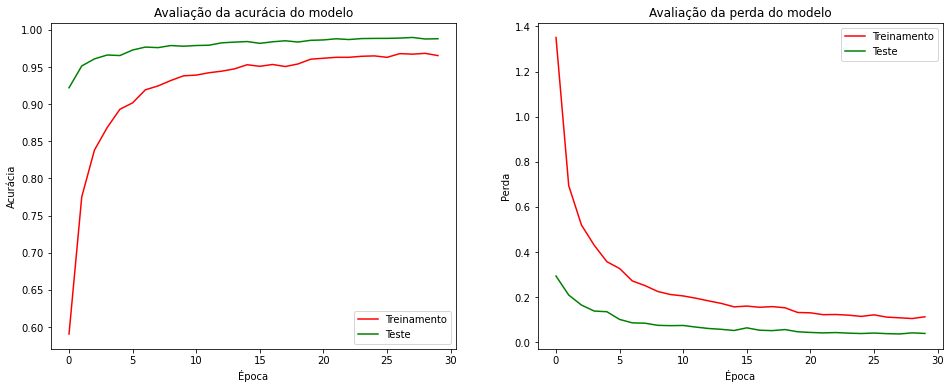

In [20]:
plt.figure(figsize=(16, 6))

# PLota acurácia
plt.subplot(121)
plt.plot(modelo_treinado_1.history['accuracy'], c='r')
plt.plot(modelo_treinado_1.history['val_accuracy'], c='g')
plt.title('Avaliação da acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'])

# Plota perda
plt.subplot(122)
plt.plot(modelo_treinado_1.history['loss'], c='r')
plt.plot(modelo_treinado_1.history['val_loss'], c='g')
plt.title('Avaliação da perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'])

# Exibe gráficos
plt.show()

Modelos mais bem elaborados tendem a ter as linhas de treinamento e teste quase sobrepostas com o decorrer das épocas. Dos gráficos acima, nota-se que um modelo tão simples como esse deve ser trabalhado mais para melhorá-lo e aumentar sua *performance*. Antes de qualquer nova iteração, será verificado o desempenho do modelo frente aos dados extras de validação.

In [23]:
# Avalia performance do modelo sobre dados extras
datagen.fit(x_extra)
cnn_1.evaluate(x_extra, y_extra);

320/320 [==============================] - 2s 5ms/step - loss: 1.0493 - accuracy: 0.7873


Nota-se que o modelo simples conseguiu obter uma acurácia de **78,73%**.

**Matriz de Confusão - Resultados com os dados extras**

Uma boa forma visual de compreender o desempenho do modelo é por meio de uma matriz de confusão, que consiste em uma tabela de valores reais *vs* valores preditos na qual constam os números de ocorrências entre cada um. Pode-se ter:

- **Verdadeiro Positivo**: quando uma condição é positiva e o valor previsto também é positivo.
- **Verdadeiro Negativo**: quando uma condição é negativa e o valor previsto também é negativo.
- **Falso Positivo (erro tipo I)**: quando uma condição é positiva o valor previsto é negativo.
- **Falso Negativo (erro tipo II)**: quando uma condição é negativa e o valor previsto é positivo.

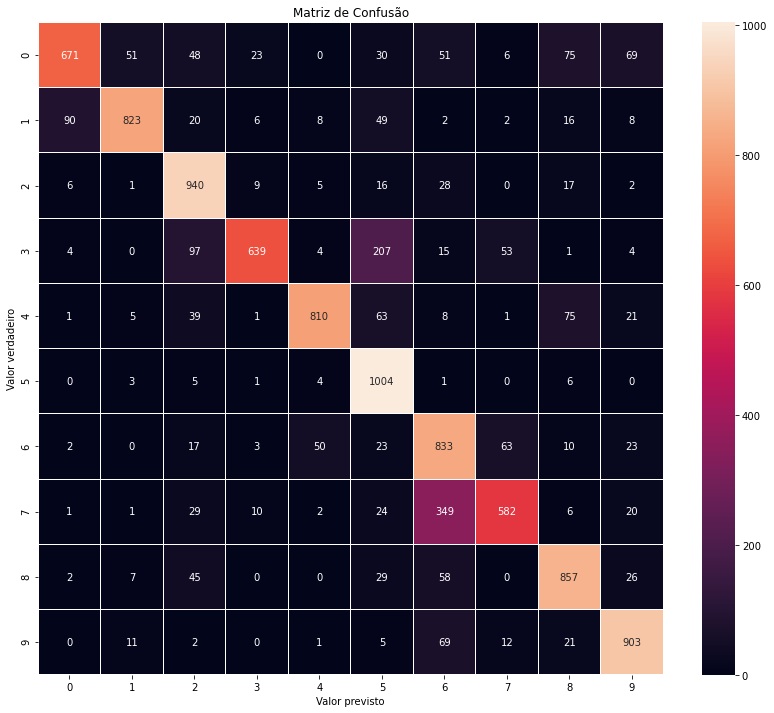

In [26]:
# Faz previsão sobre dados extras
y_previsto_extra = cnn_1.predict(x_extra) # previsto
y_verdadeiro_extra = y_extra # target

y_previsto_extra = np.argmax(y_previsto_extra, axis=1)
y_verdadeiro_extra = np.argmax(y_verdadeiro_extra, axis=1)

# gera mtriz de confusão
matriz_extra = confusion_matrix(y_verdadeiro_extra, y_previsto_extra)

# gera figura
plt.figure(figsize=(14, 12))

# Plota mapa de calor
sns.heatmap(matriz_extra, fmt=".0f", annot=True, linewidths=0.05)
plt.xlabel("Valor previsto")
plt.ylabel("Valor verdadeiro")
plt.title("Matriz de Confusão")

plt.show()

Na diagonal principal da matriz encontram-se os verdadeiros positivos, isto é, foram classificados corretamente. Apesar de uma *performance* razoável para um modelo simples, nota-se que alguns dígitos, como o 7 e o 3 (valores verdadeiros, eixo y), foram muito classificados como 6 e 5, respectivamente. Com o restante dos erros, a quantidade relativa a cada um foi bem menor.

#### Segunda implementação

Nessa segunda implementação, a rede neural será construída com 3 camadas convolucionais, das quais as 2 primeiras serão seguidas por camadas *Dropout* mencionadas anteriormente.

In [27]:
# Segunda Itereção
cnn_2 = Sequential()

# Camada convolucional
cnn_2.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu',
                 input_shape = (28,28,1)))

cnn_2.add(MaxPool2D(pool_size = (2,2)))

cnn_2.add(Dropout(0.25))


# Camada convolucional
cnn_2.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu'))

cnn_2.add(MaxPool2D(pool_size = (2,2)))

cnn_2.add(Dropout(0.25))


# Camada convolucional
cnn_2.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu'))

# Vetorização (1D)
cnn_2.add(Flatten())

# Camada totalmente conectada
cnn_2.add(Dense(256, activation = "relu"))

cnn_2.add(Dropout(0.5))

# Camada de saída
cnn_2.add(Dense(10, activation = "softmax"))

In [28]:
# Visualizando a estrutura da rede neural
cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [29]:
# Compilação
cnn_2.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Treinamento
modelo_treinado_2 = cnn_2.fit(datagen.flow(x_train, 
                                           y_train, 
                                           batch_size=1024), 
                              epochs = 30,
                              validation_data = (x_val, y_val), 
                              validation_steps = 50,
                              steps_per_epoch = 25,
                              callbacks = [learning_rate_reduction, es])

Epoch 1/30
25/25 [==============================] - 19s 742ms/step - loss: 1.1807 - accuracy: 0.6021 - val_loss: 0.2407 - val_accuracy: 0.9320
Epoch 2/30
25/25 [==============================] - 18s 739ms/step - loss: 0.4482 - accuracy: 0.8564 - val_loss: 0.1054 - val_accuracy: 0.9684
Epoch 3/30
25/25 [==============================] - 21s 845ms/step - loss: 0.2455 - accuracy: 0.9230 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 4/30
25/25 [==============================] - 24s 955ms/step - loss: 0.1755 - accuracy: 0.9451 - val_loss: 0.0546 - val_accuracy: 0.9836
Epoch 5/30
25/25 [==============================] - 21s 844ms/step - loss: 0.1397 - accuracy: 0.9574 - val_loss: 0.0586 - val_accuracy: 0.9828
Epoch 6/30
25/25 [==============================] - 22s 869ms/step - loss: 0.1343 - accuracy: 0.9576 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 7/30
25/25 [==============================] - 23s 940ms/step - loss: 0.1368 - accuracy: 0.9587 - val_loss: 0.0567 - val_accuracy: 0.9826

#### Resultados do treinamento

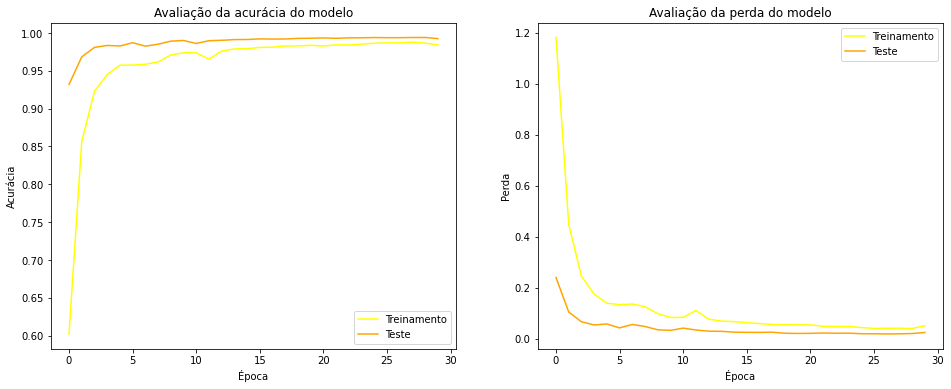

In [31]:
plt.figure(figsize=(16, 6))

# PLota acurácia
plt.subplot(121)
plt.plot(modelo_treinado_2.history['accuracy'], c='yellow')
plt.plot(modelo_treinado_2.history['val_accuracy'], c='orange')
plt.title('Avaliação da acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'])

# Plota perda
plt.subplot(122)
plt.plot(modelo_treinado_2.history['loss'], c='yellow')
plt.plot(modelo_treinado_2.history['val_loss'], c='orange')
plt.title('Avaliação da perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Teste'])

# Exibe gráficos
plt.show()

In [33]:
# Avalia performance do modelo sobre dados extras
datagen.fit(x_extra)
cnn_2.evaluate(x_extra, y_extra);

320/320 [==============================] - 2s 7ms/step - loss: 0.9582 - accuracy: 0.8222


#### Matriz de Confusão - Resultados com os dados extras

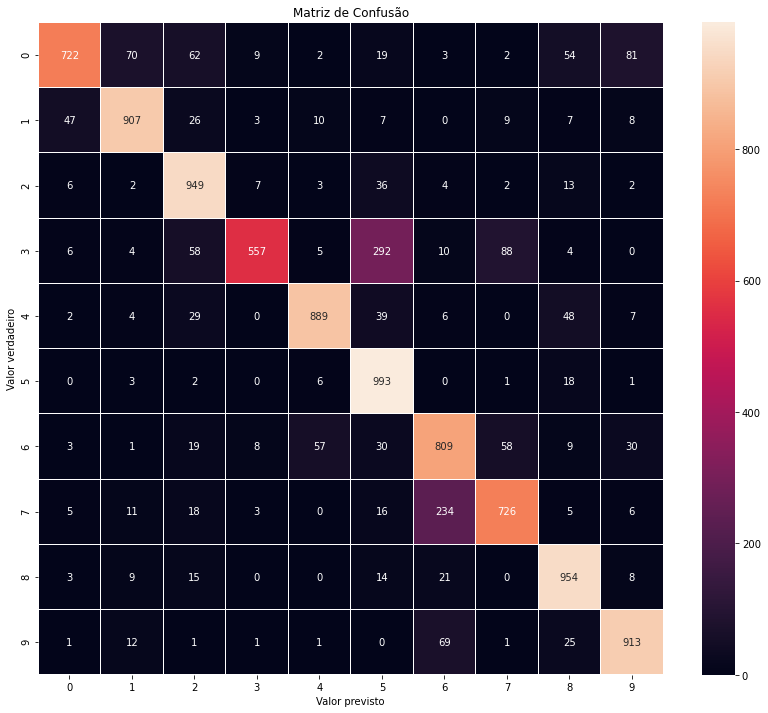

In [32]:
# Faz previsão sobre dados extras
y_previsto_extra_2 = cnn_2.predict(x_extra) # previsto
y_verdadeiro_extra_2 = y_extra # target

y_previsto_extra_2 = np.argmax(y_previsto_extra_2, axis=1)
y_verdadeiro_extra_2 = np.argmax(y_verdadeiro_extra_2, axis=1)

# gera mtriz de confusão
matriz_extra_2 = confusion_matrix(y_verdadeiro_extra_2, y_previsto_extra_2)

# gera figura
plt.figure(figsize=(14, 12))

# Plota mapa de calor
sns.heatmap(matriz_extra_2, fmt=".0f", annot=True, linewidths=0.05)
plt.xlabel("Valor previsto")
plt.ylabel("Valor verdadeiro")
plt.title("Matriz de Confusão")

plt.show()

Em relação à primeira versão do modelo, as predições incorretas nos dígitos 7 e 3 continuam sendo as de maior ocorrência. Contudo, já é possível perceber que a quantidade de erros nessa segunda iteração foi menor que na primeira.